In [56]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
directory_list = ["../data/dataset/EconomicIndexCa/", "../data/dataset/EconomicIndexUs/", "../data/dataset/MarketData/"]
# directory_list = ["../data/dataset/EconomicIndexUs/"]

do_not_touch_file = ["weekly-economic-index_Datathon.xlsx", 'Crude_Oil_Component_Weights.csv']

agglomerate = pd.DataFrame({"date": []})

for directory in directory_list:
    for file in os.listdir(directory):
        
        if file.endswith(".csv") and file not in do_not_touch_file:
            filename = file.split('.csv')[0]
            print(filename)
            df = pd.read_csv(directory + file)
            df.columns = map(str.lower, df.columns)
            for i in range(df.shape[0]):
                date_id = df.loc[i, "date"]
                if date_id > "2017-01-03":
                    if date_id in list(agglomerate["date"].values):
                        print("Duplicate date found: " + date_id)
                        #add to the existing row and missing columns
                        for column in df.columns:
                            if column != "date":
                                agglomerate.loc[agglomerate["date"] == date_id, f"{column}_{filename}"] = df.loc[i, column]
                    else:
                        #add a row in dataframe with only the date as the first column
                        agglomerate = agglomerate.append({"date": date_id}, ignore_index=True)

                        #add the missing columns
                        for column in df.columns:
                            if column != "date":
                                agglomerate.loc[agglomerate["date"] == date_id, f"{column}_{filename}"] = df.loc[i, column]

                               
agglomerate.to_csv("../data/dataset/agglomerate/agglomerate.csv", index=False)

In [58]:
# X_train, X_test, y_train, y_test = train_test_split(agglomerate.drop(["fxusdcad_FXUSDCAD_rsi"], axis=1), agglomerate["fxusdcad_FXUSDCAD_rsi"], test_size=0.2, random_state=42)

X_train = pd.DataFrame()
X_test = pd.DataFrame()
y_train = pd.DataFrame()
y_test = pd.DataFrame()

for i in range(agglomerate.shape[0]):
    threshold = "2022-05-06"
    if agglomerate.loc[i, "date"] > threshold:
        X_test = X_test.append(agglomerate.loc[i], ignore_index=True)
        X_test = X_test.drop(["fxusdcad_FXUSDCAD_rsi"], axis=1)
        y_test = y_test.append({"date": agglomerate.loc[i, "date"], "label": agglomerate.loc[i, "fxusdcad_FXUSDCAD_rsi"]}, ignore_index=True)
    else:
        X_train = X_train.append(agglomerate.loc[i], ignore_index=True)
        X_train = X_train.drop(["fxusdcad_FXUSDCAD_rsi"], axis=1)
        y_train = y_train.append({"date": agglomerate.loc[i, "date"], "label": agglomerate.loc[i, "fxusdcad_FXUSDCAD_rsi"]}, ignore_index=True)

X_train.to_csv("../data/train/X_train.csv", index=False)
X_test.to_csv("../data/test/X_test.csv", index=False)
y_train.to_csv("../data/train/y_train.csv", index=False)
y_test.to_csv("../data/test/y_test.csv", index=False)



C:\Users\jeanj\AppData\Local\Temp\ipykernel_53996\3339149549.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(agglomerate.loc[i], ignore_index=True)
C:\Users\jeanj\AppData\Local\Temp\ipykernel_53996\3339149549.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append({"date": agglomerate.loc[i, "date"], "label": agglomerate.loc[i, "fxusdcad_FXUSDCAD_rsi"]}, ignore_index=True)
C:\Users\jeanj\AppData\Local\Temp\ipykernel_53996\3339149549.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(agglomerate.loc[i], ignore_index=True)
C:\Users\jeanj\AppData\Local\Temp\ipykernel_53996\3339149549.py:22: FutureWarning: The frame.append method is deprecated and wi

In [59]:
X_train.head()


,date,w.bcpi_BCPI_WEEKLY,w.bcne_BCPI_WEEKLY,w.ener_BCPI_WEEKLY,w.mtls_BCPI_WEEKLY,w.fopr_BCPI_WEEKLY,w.agri_BCPI_WEEKLY,w.fish_BCPI_WEEKLY,unnamed: 0_CA.-interest_rate,v39078_CA.-interest_rate,...,3 mo_USTREASURY_YIELD,6 mo_USTREASURY_YIELD,1 yr_USTREASURY_YIELD,2 yr_USTREASURY_YIELD,3 yr_USTREASURY_YIELD,5 yr_USTREASURY_YIELD,7 yr_USTREASURY_YIELD,10 yr_USTREASURY_YIELD,20 yr_USTREASURY_YIELD,30 yr_USTREASURY_YIELD
0,2017-01-04,393.77,303.21,951.91,488.66,356.42,207.02,1293.84,1307.0,0.75,...,0.53,0.63,0.87,1.24,1.50,1.94,2.26,2.46,2.78,3.05
1,2017-01-11,394.70,306.27,947.37,495.98,354.37,209.70,1329.93,1312.0,0.75,...,0.52,0.60,0.82,1.20,1.47,1.89,2.18,2.38,2.68,2.96
2,2017-01-18,398.66,311.46,950.36,504.73,360.56,213.36,1329.93,1317.0,0.75,...,0.53,0.63,0.82,1.23,1.51,1.93,2.24,2.42,2.74,3.00
3,2017-01-25,400.28,313.27,952.56,506.63,363.74,214.82,1329.93,1322.0,0.75,...,0.50,0.61,0.82,1.23,1.52,1.99,2.33,2.53,2.84,3.10
4,2017-02-01,404.62,314.91,968.21,509.20,368.09,215.08,1336.17,1327.0,0.75,...,0.51,0.65,0.83,1.22,1.49,1.93,2.27,2.48,2.80,3.08


In [60]:
y_train.head()

,date,label
0,2017-01-04,1.3315
1,2017-01-11,1.3250
2,2017-01-18,1.3099
3,2017-01-25,1.3088
4,2017-02-01,1.3074


In [51]:
y_test.head(10)

,date,label
0,2022-05-11,1.2970
1,2022-05-18,1.2841
2,2022-05-25,1.2837
3,2022-06-01,1.2639
4,2022-06-08,1.2540
5,2022-06-15,1.2948
6,2022-06-22,1.2942
7,2022-06-29,1.2878
8,2022-07-06,1.3047
9,2022-07-13,1.2976


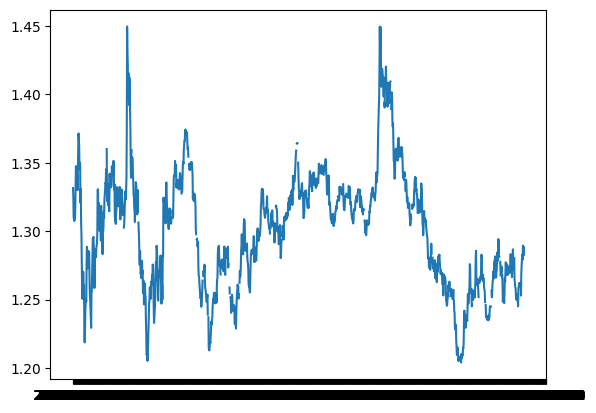

In [61]:
import matplotlib.pyplot as plt

plt.plot(y_train["date"], y_train["label"])

In [63]:
y_test.shape[0]

187